# Importation des bibliotheques 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv
import os
from matplotlib.image import imread
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploration du dataset

In [ ]:
data_dir = '/content/drive/MyDrive/DATASET/meme_data'
#data_dir = 'meme_data'

In [ ]:
os.listdir(data_dir)

['train', 'test']

In [ ]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

In [ ]:
os.listdir(test_path)

['pictures', 'meme']

In [ ]:
os.listdir(train_path)

['pictures', 'meme']

In [ ]:
os.listdir(train_path+'meme')[45]

'7qk5na.jpg'

In [ ]:
first_meme = train_path+'meme'+'/7qk5na.jpg'

In [ ]:
first_meme_imread = imread(first_meme)

In [ ]:
first_meme

'/content/drive/MyDrive/DATASET/meme_data/train/meme/7qk5na.jpg'

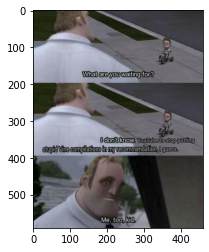

In [ ]:
plt.imshow(first_meme_imread)

In [ ]:
os.listdir(train_path+'pictures')[0]

'000000226903.jpg'

In [ ]:
imread(train_path+'pictures'+'/000000000139.jpg').shape

(426, 640, 3)

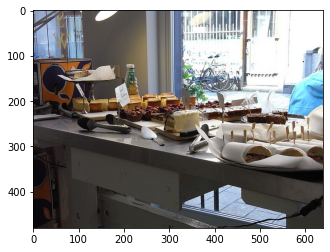

In [ ]:
plt.imshow(imread(train_path+'pictures'+'/000000226903.jpg'))

# lecture du nombre d'images 

In [ ]:
number_test_meme = len(os.listdir(test_path+'meme'))
number_train_meme = len(os.listdir(train_path+'meme'))
number_train_pictures = len(os.listdir(test_path+'pictures'))
number_test_pictures = len(os.listdir(train_path+'pictures'))



print("nombre de meme dans test :",number_test_meme)
print("nombre de meme dans train :",number_train_meme)
print("nombre de photo dans test :",number_train_pictures)
print("nombre de photo dans train :",number_test_pictures)



nombre de meme dans test : 326
nombre de meme dans train : 3000
nombre de photo dans test : 326
nombre de photo dans train : 3000


# Normalisation de la taille des images 

In [ ]:
from tqdm import tqdm

In [ ]:
dim1=[]
dim2=[]


for image_filename in tqdm(os.listdir(test_path+'meme')):
    img = imread(test_path+'meme/'+image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

100%|██████████| 326/326 [02:30<00:00,  2.16it/s]


In [ ]:
i=0
for image_filename in tqdm(os.listdir(test_path+'pictures')):
    img = imread(test_path+'pictures/'+image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

100%|██████████| 326/326 [03:36<00:00,  1.51it/s]


In [ ]:
len(dim1)

688

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


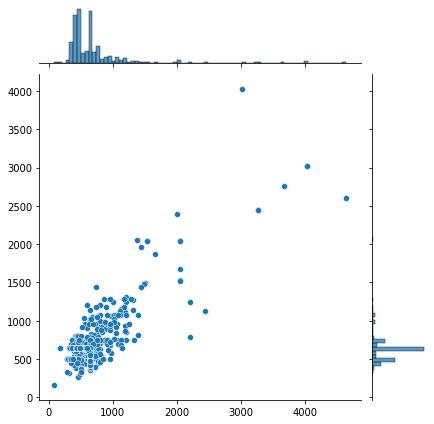

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

662.5857558139535

In [ ]:
np.mean(dim2)

701.6119186046511

In [ ]:
img_shape=(672, 710, 3)

# image augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [ ]:
image_gen = ImageDataGenerator(rotation_range=5,
 width_shift_range=0.1,
  shear_range=0.1,
   height_shift_range=0.1,
    #brightness_range=[50,90],
     zoom_range=0.3,
      fill_mode='nearest',
       horizontal_flip=True,
       vertical_flip=True,
       rescale=1/255)

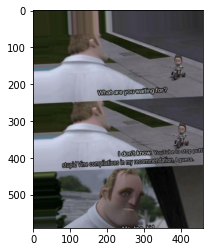

In [ ]:
plt.imshow(image_gen.random_transform(imread(first_meme)))

# Creation des batchs

In [ ]:
imread(first_meme).shape

(590, 460, 3)

In [ ]:
image_gen.flow_from_directory(train_path)

Found 6000 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 652 images belonging to 2 classes.


# Creation du modele

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 670, 708, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 335, 354, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 333, 352, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 166, 176, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 164, 174, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 82, 87, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 456576)            0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
batch_size = 16

In [ ]:
train_images_gen = image_gen.flow_from_directory(train_path,target_size=img_shape[:2],color_mode='rgb',class_mode='binary',batch_size=batch_size, save_format='png',)

Found 6000 images belonging to 2 classes.


In [ ]:
test_images_gen = image_gen.flow_from_directory(test_path,target_size=img_shape[:2],color_mode='rgb', class_mode='binary',batch_size=batch_size, save_format='png', shuffle=False)

Found 652 images belonging to 2 classes.


In [ ]:
train_images_gen.class_indices

{'meme': 0, 'pictures': 1}

In [ ]:
#result = model.fit(train_images_gen,epochs=8, validation_data=test_images_gen, callbacks=[early_stop])

In [ ]:
model.save('meme_detector.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/STAGE/CNN/meme_detector.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation du model

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
model.evaluate(test_images_gen)

41/41 [==============================] - 202s 5s/step - loss: 0.2108 - accuracy: 0.9310


[0.21077251434326172, 0.9309815764427185]

In [ ]:
pred= model.predict(test_images_gen)

In [ ]:
predictions = pred > 0.5

In [ ]:
print(classification_report(test_images_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       326
           1       0.93      0.98      0.95       326

    accuracy                           0.95       652
   macro avg       0.95      0.95      0.95       652
weighted avg       0.95      0.95      0.95       652



In [ ]:
confusion_matrix(test_images_gen.classes, predictions)

array([[301,  25],
       [  8, 318]])

# Test sur des vrais photos

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
test_images_gen.class_indices

In [ ]:
test_picture = 'moi.png'
test_meme_lele = 'test_meme_lele.jpg'
not_a_meme = 'not_a_meme_3.png'

In [ ]:
def meme_detection(img_path):
  picture_test = image.load_img(img_path, target_size=img_shape)
  picture_test_arr = image.img_to_array(picture_test)
  picture_test_arr = picture_test_arr/255
  picture_test_arr = np.expand_dims(picture_test_arr, axis=0)
  print(model.predict(picture_test_arr))
  if ((model.predict(picture_test_arr) >0.5).astype('int32') == 1):
    print("its a random picture ")
  else:
    print(" its a meme, i do declare")

In [ ]:
meme_detection(test_picture)

In [ ]:
meme_detection(test_meme_lele)

In [ ]:
meme_detection(not_a_meme)